In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
plt.rcParams['figure.figsize'] = (15,10)

import functions as src

In [27]:
prediction_window=None
zf = zipfile.ZipFile('../content/anonymisedData.zip') 
student_vle = pd.read_csv(zf.open('studentVle.csv'))
if prediction_window:
    student_vle = student_vle[student_vle['date'] < prediction_window]
else: 
    student_vle = student_vle[student_vle['date'] < 270]

assessments = pd.read_csv(zf.open('studentAssessment.csv'), skiprows=[128223,64073])
assessments_info = pd.read_csv(zf.open('assessments.csv'))

student_info =  pd.read_csv(zf.open('studentInfo.csv'),
                            usecols = ['code_module','code_presentation','id_student',
                                        'final_result'])
student_unregistration = pd.read_csv(zf.open('studentRegistration.csv'),
                                usecols = ['code_module','code_presentation','id_student',
                                            'date_unregistration'])

In [2]:
df = src.get_timeseries_table()
df

,assess_submitted_1,assess_score_1,assess_submitted_2,assess_score_2,assess_submitted_3,assess_score_3,assess_submitted_4,assess_score_4,assess_submitted_5,assess_score_5,assess_submitted_6,assess_score_6,assess_submitted_7,assess_score_7,assess_submitted_8,assess_score_8,assess_submitted_9,assess_score_9,assess_submitted_10,assess_score_10,assess_submitted_11,assess_score_11,assess_submitted_12,assess_score_12,assess_submitted_13,assess_score_13,assess_submitted_14,assess_score_14,sum_activities_-25,sum_click_-25,activities_x_clicks_-25,sum_activities_-24,sum_click_-24,activities_x_clicks_-24,sum_activities_-23,sum_click_-23,activities_x_clicks_-23,sum_activities_-22,sum_click_-22,activities_x_clicks_-22,...,sum_click_256,activities_x_clicks_256,sum_activities_257,sum_click_257,activities_x_clicks_257,sum_activities_258,sum_click_258,activities_x_clicks_258,sum_activities_259,sum_click_259,activities_x_clicks_259,sum_activities_260,sum_click_260,activities_x_clicks_260,sum_activities_261,sum_click_261,activities_x_clicks_261,sum_activities_262,sum_click_262,activities_x_clicks_262,sum_activities_263,sum_click_263,activities_x_clicks_263,sum_activities_264,sum_click_264,activities_x_clicks_264,sum_activities_265,sum_click_265,activities_x_clicks_265,sum_activities_266,sum_click_266,activities_x_clicks_266,sum_activities_267,sum_click_267,activities_x_clicks_267,sum_activities_268,sum_click_268,activities_x_clicks_268,code_module,final_result
registration,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAA2013J11391,-1.0,78.0,-1.0,85.0,-2.0,80.0,-2.0,85.0,-3.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAA,Pass
AAA2013J28400,3.0,70.0,-2.0,68.0,4.0,70.0,-2.0,64.0,-3.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAA,Pass
AAA2013J31604,-2.0,72.0,-3.0,71.0,-2.0,74.0,-1.0,88.0,-2.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAA,Pass
AAA2013J32885,7.0,69.0,21.0,30.0,7.0,63.0,15.0,35.0,7.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAA,Pass
AAA2013J38053,0.0,79.0,10.0,69.0,0.0,74.0,0.0,50.0,0.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,AAA,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GGG2014J695877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GGG,Fail
GGG2014J697364,0.0,0.0,0.0,0.0,0.0,0

In [105]:
student_vle, assessments, assessments_info, student_info, student_unregistration = src.import_tables(None)

In [132]:
df_activity = df.loc[:,df.columns.str.contains('sum_activities')]
df_assess = df.loc[:,df.columns.str.contains('assess')]
df_clicks = df.loc[:,df.columns.str.contains('click')]
df_activity

,sum_activities_-25,sum_activities_-24,sum_activities_-23,sum_activities_-22,sum_activities_-21,sum_activities_-20,sum_activities_-19,sum_activities_-18,sum_activities_-17,sum_activities_-16,sum_activities_-15,sum_activities_-14,sum_activities_-13,sum_activities_-12,sum_activities_-11,sum_activities_-10,sum_activities_-9,sum_activities_-8,sum_activities_-7,sum_activities_-6,sum_activities_-5,sum_activities_-4,sum_activities_-3,sum_activities_-2,sum_activities_-1,sum_activities_0,sum_activities_1,sum_activities_2,sum_activities_3,sum_activities_4,sum_activities_5,sum_activities_6,sum_activities_7,sum_activities_8,sum_activities_9,sum_activities_10,sum_activities_11,sum_activities_12,sum_activities_13,sum_activities_14,...,sum_activities_229,sum_activities_230,sum_activities_231,sum_activities_232,sum_activities_233,sum_activities_234,sum_activities_235,sum_activities_236,sum_activities_237,sum_activities_238,sum_activities_239,sum_activities_240,sum_activities_241,sum_activities_242,sum_activities_243,sum_activities_244,sum_activities_245,sum_activities_246,sum_activities_247,sum_activities_248,sum_activities_249,sum_activities_250,sum_activities_251,sum_activities_252,sum_activities_253,sum_activities_254,sum_activities_255,sum_activities_256,sum_activities_257,sum_activities_258,sum_activities_259,sum_activities_260,sum_activities_261,sum_activities_262,sum_activities_263,sum_activities_264,sum_activities_265,sum_activities_266,sum_activities_267,sum_activities_268
registration,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAA2013J11391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,10.0,16.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,27.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAA2013J28400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,4.0,19.0,7.0,3.0,3.0,0.0,5.0,0.0,15.0,4.0,0.0,0.0,9.0,4.0,18.0,5.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAA2013J31604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,15.0,0.0,0.0,7.0,0.0,1.0,0.0,6.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,12.0,7.0,2.0,12.0,3.0,3.0,...,2.0,6.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,3.0,11.0,3.0,3.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
AAA2013J32885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,4.0,2.0,4.0,4.0,14.0,0.0,7.0,13.0,0.0,0.0,5.0,5.0,7.0,4.0,0.0,6.0,0.0,0.0,0.0,6.0,6.0,3.0,6.0,0.0,...,0.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAA2013J38053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,7.0,8.0,0.0,3.0,6.0,3.0,9.0,3.0,3.0,10.0,5.0,5.0,0.0,6.0,4.0,9.0,9.0,10.0,2.0,9.0,5.0,0.0,5.0,6.0,...,0.0,3.0,1.0,4.0,0.0,3.0,4.0,1.0,0.0,3.0,5.0,3.0,3.0,3.0,8.0,0.0,0.0,5.0,2.0,0.0,0.0,3.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GGG2014J695877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,11.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,3.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GGG2014J697364,0.0,0.0,0.0,0.0,0.0,0.

In [191]:
act_avg = df_activity.mean(axis=0)
act_avg.index = act_avg.index.str.replace('sum_activities_','').astype(int)
act_avg = act_avg.reset_index()
act_avg.columns = ['day','avg_activities']
act_avg['today'] = datetime.today()
act_avg['day'] = act_avg['day'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))
act_avg['date'] = act_avg['day'] + act_avg['today']
act_avg = act_avg[['date','avg_activities']].set_index('date', drop=True)
act_avg

,avg_activities
date,
2021-04-10 13:45:55.231889,0.146561
2021-04-11 13:45:55.231889,0.132762
2021-04-12 13:45:55.231889,0.089419
2021-04-13 13:45:55.231889,0.059020
2021-04-14 13:45:55.231889,0.043821
...,...
2022-01-24 13:45:55.231889,0.052702
2022-01-25 13:45:55.231889,0.047852
2022-01-26 13:45:55.231889,0.032618


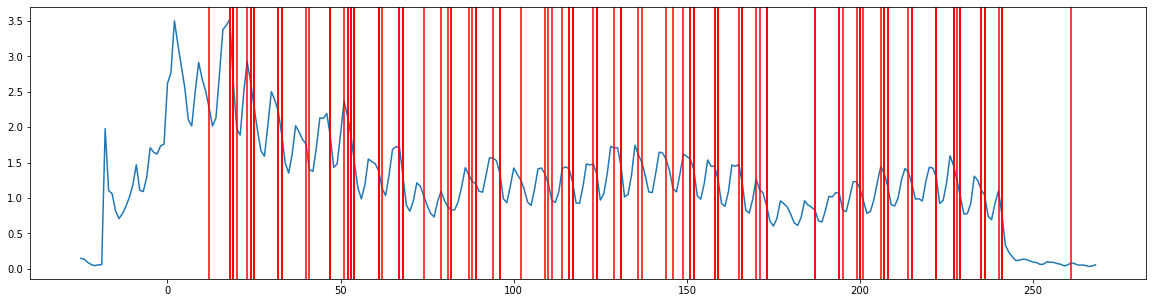

In [137]:
plt.figure(figsize=(20,5))
plt.plot(act_avgs)
for date in assessments_info['date']:
    plt.axvline(x=date, color='red')
plt.show()

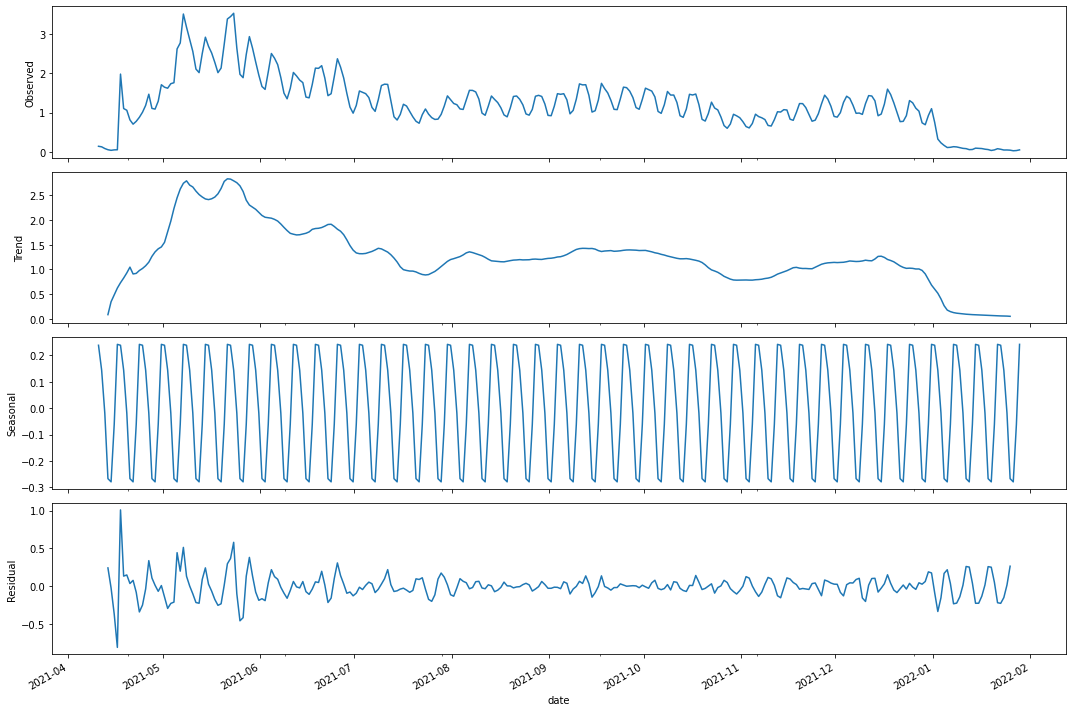

In [199]:
results = seasonal_decompose(act_avg)
results.plot()

plt.show()

Let's take a closer look at that seasonality

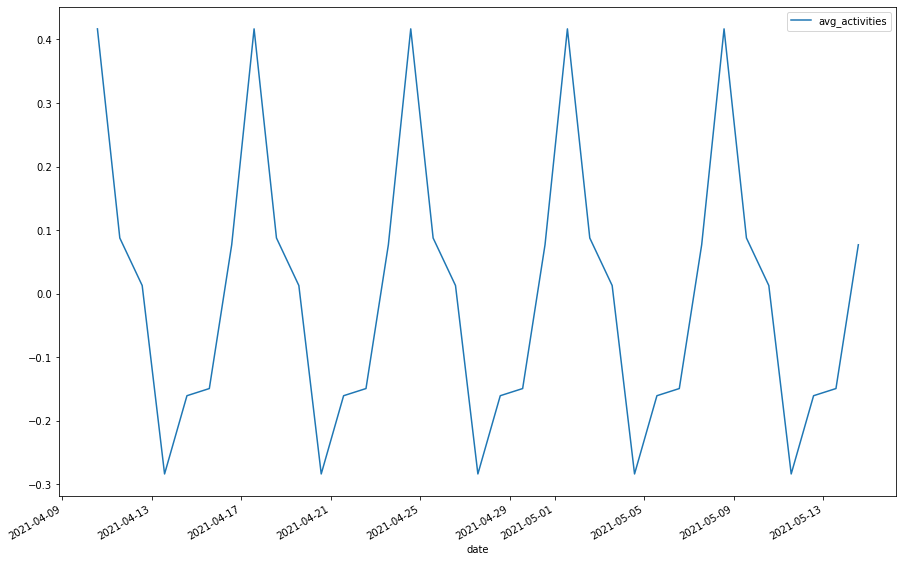

In [205]:
results = seasonal_decompose(act_avg.head(35))
results.seasonal.plot()
plt.show()

Yep, we see here a weekly rhythm to studying.  Our dates not not actually correct, just relative so we can use timeseries functionality, so we cannot say for certain what days of the week these rhythms correspond to.  However, I might hypothesize that students study more on weekends and less on week days.  This assumes most are working during the week.  If that assumption is false, than it seems more likely students are taking weekends off of studying.  However, this is all conjecture since we do not have the absolute dates for these courses.

How about the activity trends over the course of the module?

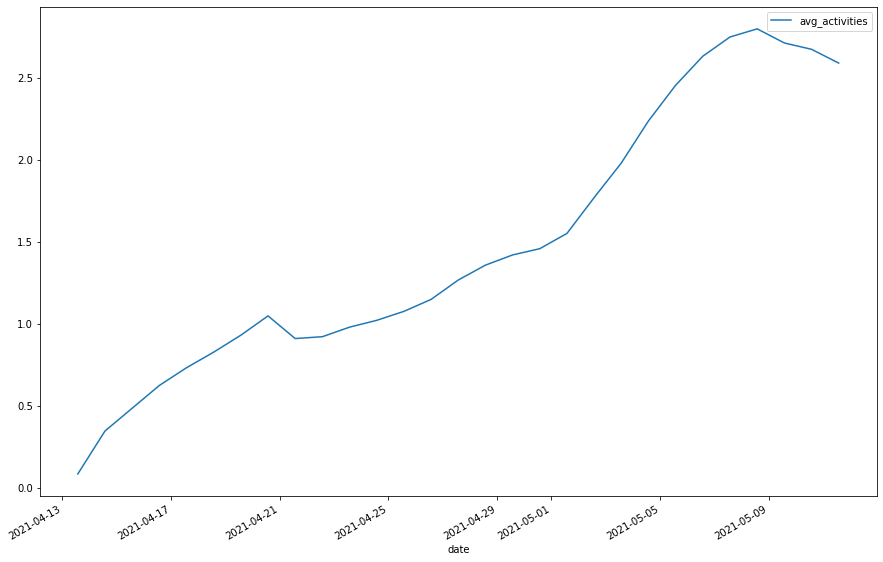

In [206]:
results.trend.plot()

In [207]:
df

,assess_submitted_1,assess_score_1,assess_submitted_2,assess_score_2,assess_submitted_3,assess_score_3,assess_submitted_4,assess_score_4,assess_submitted_5,assess_score_5,assess_submitted_6,assess_score_6,assess_submitted_7,assess_score_7,assess_submitted_8,assess_score_8,assess_submitted_9,assess_score_9,assess_submitted_10,assess_score_10,assess_submitted_11,assess_score_11,assess_submitted_12,assess_score_12,assess_submitted_13,assess_score_13,assess_submitted_14,assess_score_14,sum_activities_-25,sum_click_-25,activities_x_clicks_-25,sum_activities_-24,sum_click_-24,activities_x_clicks_-24,sum_activities_-23,sum_click_-23,activities_x_clicks_-23,sum_activities_-22,sum_click_-22,activities_x_clicks_-22,...,sum_click_256,activities_x_clicks_256,sum_activities_257,sum_click_257,activities_x_clicks_257,sum_activities_258,sum_click_258,activities_x_clicks_258,sum_activities_259,sum_click_259,activities_x_clicks_259,sum_activities_260,sum_click_260,activities_x_clicks_260,sum_activities_261,sum_click_261,activities_x_clicks_261,sum_activities_262,sum_click_262,activities_x_clicks_262,sum_activities_263,sum_click_263,activities_x_clicks_263,sum_activities_264,sum_click_264,activities_x_clicks_264,sum_activities_265,sum_click_265,activities_x_clicks_265,sum_activities_266,sum_click_266,activities_x_clicks_266,sum_activities_267,sum_click_267,activities_x_clicks_267,sum_activities_268,sum_click_268,activities_x_clicks_268,code_module,final_result
registration,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAA2013J11391,-1.0,78.0,-1.0,85.0,-2.0,80.0,-2.0,85.0,-3.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAA,Pass
AAA2013J28400,3.0,70.0,-2.0,68.0,4.0,70.0,-2.0,64.0,-3.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAA,Pass
AAA2013J31604,-2.0,72.0,-3.0,71.0,-2.0,74.0,-1.0,88.0,-2.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAA,Pass
AAA2013J32885,7.0,69.0,21.0,30.0,7.0,63.0,15.0,35.0,7.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAA,Pass
AAA2013J38053,0.0,79.0,10.0,69.0,0.0,74.0,0.0,50.0,0.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,AAA,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GGG2014J695877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GGG,Fail
GGG2014J697364,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
dicts_test = pd.DataFrame()